In [0]:
!pip install kaggle

In [113]:
from google.colab import files
files.upload()

{}

In [0]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Feb 12 23:47 kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c 2019-1st-ml-month-with-kakr

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.86MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 21.3MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 52.7MB/s]


In [0]:
!ls

kaggle.json  sample_data  sample_submission.csv  test.csv  train.csv


In [0]:
import numpy as np 
import pandas as pd

# 데이터 준비 하는 파트

train_data = pd.read_csv('train.csv')
train_data.head()
test_val = pd.read_csv('test.csv')

#데이터를 불러오면 반드시 일정 부분은 눈으로 확인하는 습관을 들이자
test_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
#Feature Engineering : 모델이 학습할 수 있도록 데이터를 준비하고 feature를 선별하는 단계
#category value-> numeric part(직접해보기)

print(train_data.iloc[1,11])
for i in range(891):
    temp = train_data.iloc[i,11]
    if temp=="S":
        train_data.iloc[i,11]=0
    if temp=="C":
        train_data.iloc[i,11]=1
    if temp=="Q":
        train_data.iloc[i,11]=2
train_data.head()

C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


In [0]:
#많이 실수하는 부분 중에 하나 train_set 변경 시 test_set의 value도 같이 바꿔줘야함
for i in range(418):
    temp = test_val.iloc[i,10]
    if temp=="S":
        test_val.iloc[i,10]=0
    if temp=="C":
        test_val.iloc[i,10]=1
    if temp=="Q":
        test_val.iloc[i,10]=2
test_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0


In [0]:
train_data.Name = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
train_data.head()
test_val.Name =test_val.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,0
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,0


In [0]:
train_data.iloc[0,4]

'male'

In [0]:
dummy=[]
Mr = ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']
Mrs = ['the Countess', 'Mme', 'Lady']
Miss = ['Mlle', 'Ms']
for i in range(891):
    temp = train_data.iloc[i,3]
    if temp in Mr:
        train_data.iloc[i,3]="Mr"
    elif temp in Mrs:
        train_data.iloc[i,3]="Mrs"
    elif temp in Miss :
        train_data.iloc[i,3]="Miss"
    elif temp =='Dr':
        if train_data.iloc[i,4]=="male":
            train_data.iloc[i,3]="Mr"
        else:
            train_data.iloc[i,3]="Mrs"
    else:
        dummy.append(temp)
        pass

print(set(dummy))

train_data.head()

{'Master', 'Mr', 'Miss', 'Mrs'}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,0


In [0]:
test_val.iloc[0,2]

'Mr'

In [0]:
dummy=[]
Mr = ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']
Mrs = ['the Countess', 'Mme', 'Lady']
Miss = ['Mlle', 'Ms']

for i in range(418):
    temp = test_val.iloc[i,2]
    if temp in Mr:
        test_val.iloc[i,2]="Mr"
    elif temp in Mrs:
        test_val.iloc[i,2]="Mrs"
    elif temp in Miss :
        test_val.iloc[i,2]="Miss"
    elif temp =='Dr':
        if test_val.iloc[i,3]=="male":
            test_val.iloc[i,2]="Mr"
        else:
            test_val.iloc[i,2]="Mrs"
    elif temp =="Dona":
        test_val.iloc[i,2]="Mrs"
    else:
        dummy.append(temp)
        pass

print(set(dummy))

train_data.head()

{'Master', 'Mr', 'Miss', 'Mrs'}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,0


In [0]:
import numpy as np # linear algebra
from sklearn.preprocessing import LabelEncoder

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

#Label encoder를 활용하면 위의 작업을 더 쉽게할 수 있음
Label_encoder=LabelEncoder()
Label_encoder.fit(train_data.Sex)
train_data.loc[:,'Sex'] = Label_encoder.transform(train_data.Sex)
test_val.loc[:,'Sex'] = Label_encoder.transform(test_val.Sex)

#NA value를 채우기 위해 더미 변수 생성
dummy_age =round(train_data.Age.mean(),1)
print(dummy_age)

29.7


In [0]:
Label_encoder=LabelEncoder()
Label_encoder.fit(train_data.Name)
train_data.loc[:,'Name'] = Label_encoder.transform(train_data.Name)
test_val.loc[:,'Name'] = Label_encoder.transform(test_val.Name)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,3,0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,3,0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,2,1,35.0,0,0,373450,8.0500,NaN,0


In [0]:
from sklearn import preprocessing


#나이 변수는 중요하므로 scaling해준다
train_data.loc[:, 'Age'] = train_data.Age.fillna(dummy_age)
# train_data.loc[:, 'Age'] = preprocessing.scale(train_data.Age)
test_val.loc[:, 'Age'] = test_val.Age.fillna(dummy_age)
# test_val.loc[:, 'Age'] = preprocessing.scale(test_val.Age)
#category value 중 없는 부분은 우리가 0,1,2로 해줬기 때문에 0 부여
#NA가 2개라서 크게 상관은 없을듯 함
train_data.loc[:, 'Embarked'] = train_data.Embarked.fillna(2)
test_val.loc[:, 'Embarked'] = test_val.Embarked.fillna(2)

#빈곳 채우기 이곳도 마찬가지
val=  train_data.Fare.mean() 
train_data.loc[:, 'Fare'] = train_data.Fare.fillna(val)
# train_data.loc[:, 'Fare'] = preprocessing.scale(train_data.Fare)
test_val.loc[:, 'Fare'] = test_val.Fare.fillna(val)
# test_val.loc[:, 'Fare'] = preprocessing.scale(test_val.Fare)

test_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,2,1,34.5,0,0,330911,7.8292,NaN,2
1,893,3,3,0,47.0,1,0,363272,7.0000,NaN,0
2,894,2,2,1,62.0,0,0,240276,9.6875,NaN,2
3,895,3,2,1,27.0,0,0,315154,8.6625,NaN,0
4,896,3,3,0,22.0,1,1,3101298,12.2875,NaN,0


In [0]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,3,0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,3,0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,2,1,35.0,0,0,373450,8.0500,NaN,0


In [0]:
# import itertools

# stuff = ['Age', 'Sex', 'Pclass','Embarked',"SibSp","Parch","Name"]
# alov =[]
# for L in range(0, len(stuff)+1):
#     for subset in itertools.combinations(stuff, L):
#         alov.append(list(subset))
        
# alov.pop(0)

X = train_data.loc[:,['Age', 'Sex', 'Pclass', 'Embarked', 'SibSp']] #
Y = train_data.loc[:,'Survived']
XTest = test_val.loc[:,['Age', 'Sex', 'Pclass', 'Embarked', 'SibSp']]
#해당 변수들에 빈 곳이 있는지 확인한다
#있으면 코드가 안돌아감
count_nan = len(Y) - Y.count()
count_nan = len(X) - X.count()

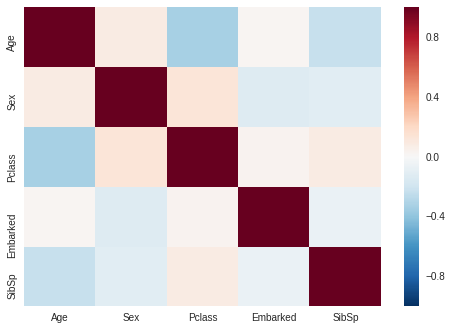

In [0]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
#Train test validation set은 6/2/2가 좋으나 여기서는 testset이 이미 빠져있으므로 test_size 20%으로 선언
from sklearn.model_selection import train_test_split
XTrain, XValid, YTrain, YValid = train_test_split(
      X, Y, test_size=0.3)

In [0]:
from sklearn.linear_model import LogisticRegression
from subprocess import check_output
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

model1 = svm.LinearSVC()
model2 = neighbors.KNeighborsClassifier()
model3 = RandomForestClassifier()
model4 = LogisticRegression()
model5 = LinearDiscriminantAnalysis()
model6 = DecisionTreeClassifier()
model7 = MLPClassifier()
model8 = ExtraTreesClassifier()
model9 = AdaBoostClassifier()
model10 = GradientBoostingClassifier()
model11 =XGBClassifier(Eta=0.4)
model12 =XGBClassifier(
 learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
model13 = QuadraticDiscriminantAnalysis()
model14 = BaggingClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=2000, random_state=1)

clf = VotingClassifier(estimators=[
                        ('lsvc', model1),  #0.78 0.78
#                         ('knn', model2), #0.75 #0.85
#                         ('rfor', model3), #0.8 #0.81
                        ('lr', model4), #0.8 #0.78
                        ('lda', model5), #0.78 #0.77
#                         ('dc', model6), #0.81 #0.82
#                         ('mlpc', model7), #0.78 #0.8
#                         ('etc', model8), #0.78 #0.81
#                         ('abc', model9), #0.8 #0.81
#                         ("gbc",model10), #0.76 #0.8/
#                         ("XG",model11), #0.81
#                         ("XGB",model12),
                        ("QD",model13)
                                ])

# clf = VotingClassifier(estimators=[
#                         ('Extra', model8),
#                         ('XGB', model12),
#                         ('QD', model13),
#                         ('BC', model14)
#                                   ])

# clf = model12

# DecisionTreeClassifier(max_depth=4)

# LogisticRegression(C=1.0, random_state=1)

sc = StandardScaler() #
X_train_std = sc.fit_transform(XTrain) #
X_valid_std = sc.fit_transform(XValid) #
X_test_std = sc.transform(XTest) #

pca = PCA(n_components=4) #

X_train_pca = pca.fit_transform(X_train_std) #
X_valid_pca = pca.fit_transform(X_valid_std) #
X_test_pca = pca.transform(X_test_std) #

# clf.fit(XTrain, YTrain) #
clf.fit(X_train_pca, YTrain) #

confidence = clf.score(X_valid_pca, YValid)
print('accuracy:',confidence)
predictions = clf.predict(X_test_pca)

accuracy: 0.8134328358208955


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: DataConversionWarning: Data with input dtype int64, float64 were all co

In [0]:
#이제 우리가 제출할 부분
# yPredTest = LR.predict(XTest)
# # 잘 나오는지 한번 눈으로 확인
# print(yPredTest)

In [0]:
#제출
# sub = pd.DataFrame({'PassengerId': test_val['PassengerId'],
#                     'Survived': yPredTest})
# sub.to_csv('scikitLRExample.csv', index=False)
sub = pd.DataFrame({'PassengerId': test_val['PassengerId'],
                    'Survived': predictions})
sub.to_csv('submission.csv', index=False)

In [0]:
!ls

kaggle.json  sample_submission.csv  submission.csv  train.csv
sample_data  scikitLRExample.csv    test.csv


In [0]:

files.download('submission.csv')